In [1]:
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import pandas as pd

import scrublet as scr

sc.set_figure_params(dpi=120)
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
adata = sc.read("../data/CART_fulldataset_clustered.h5ad")

# Figure 1c

/tmp/ipykernel_2813/1319386819.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  adata.obs['tp_use'] = adata.obs['timepoint_fine'].str.replace('Baseline_.*','Baseline').str.replace('^D7$','D7-unsorted')


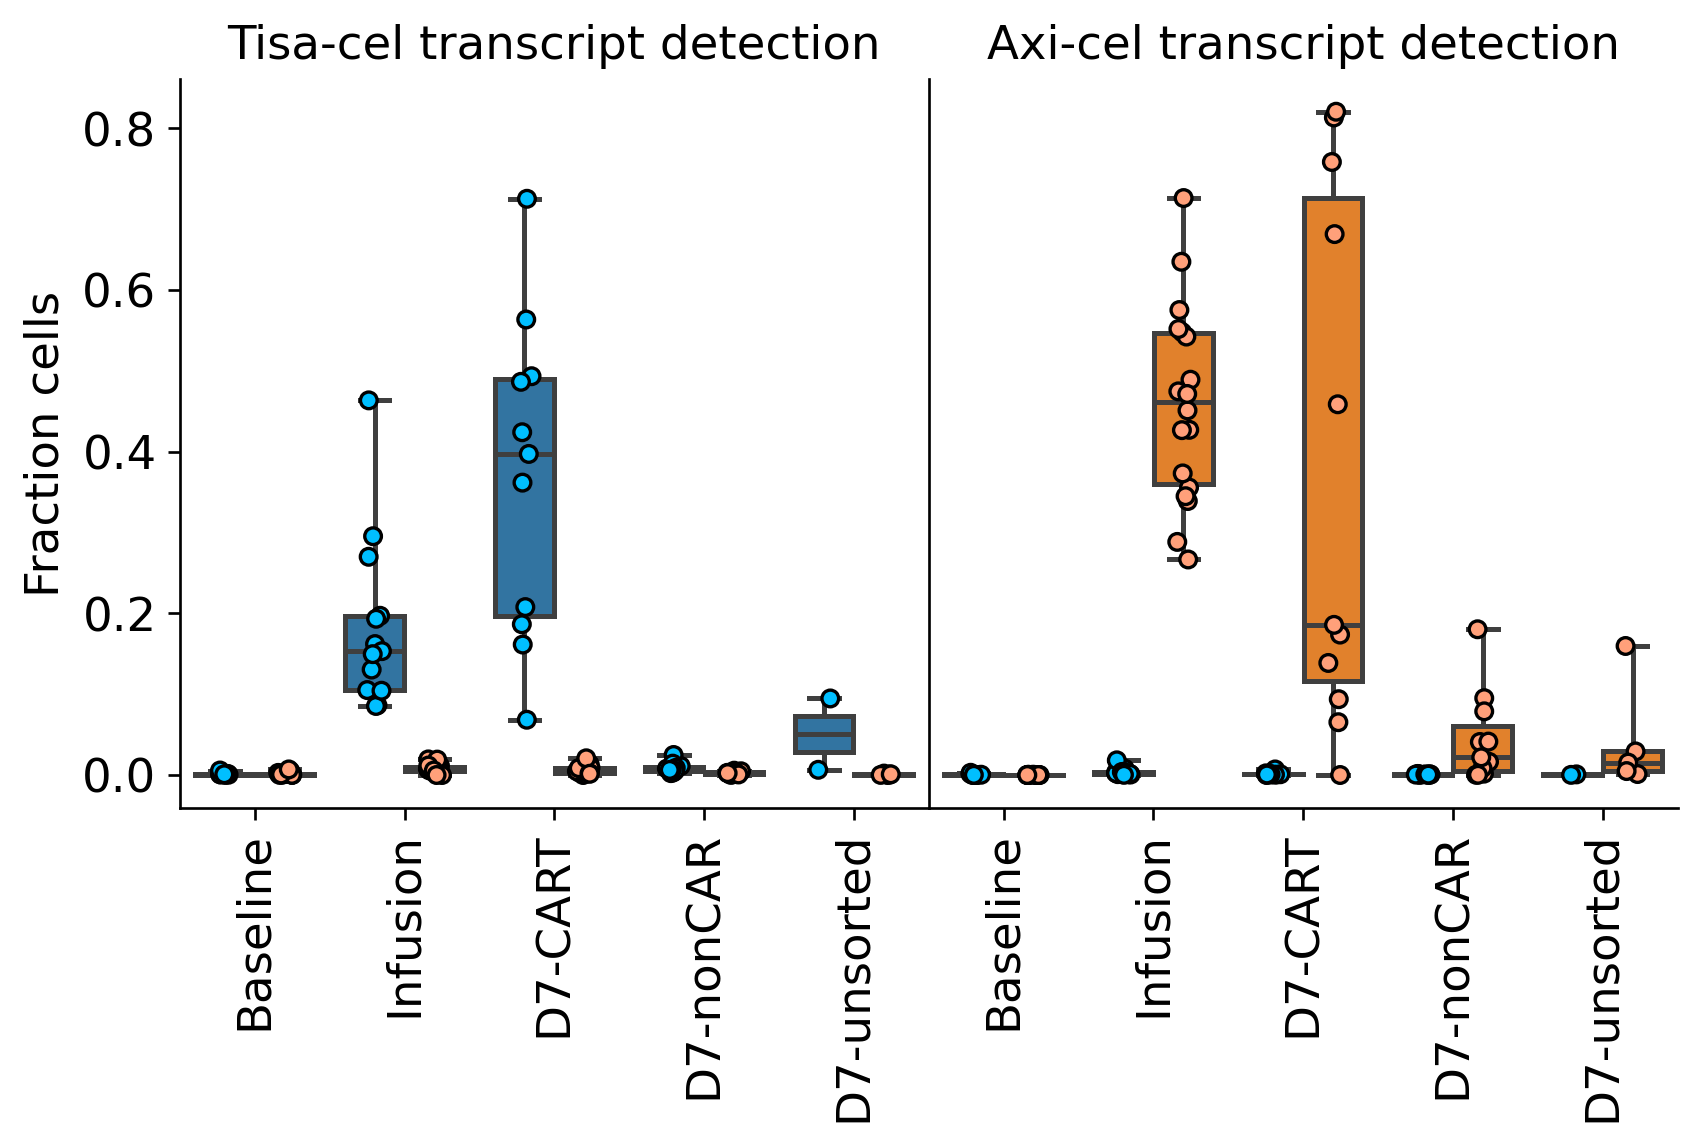

In [3]:
f,ax = plt.subplots(1,2,figsize=(8,4))

# merge different baseline timepoints, but separate D7 based on sorting strategy
adata.obs['tp_use'] = adata.obs['timepoint_fine'].str.replace('Baseline_.*','Baseline').str.replace('^D7$','D7-unsorted')
adata.obs['tp_use'] = pd.Categorical(adata.obs['tp_use'],categories=['Baseline',
                                                                     'Infusion',
                                                                     'D7-CART',
                                                                     'D7-nonCAR',
                                                                     'D7-unsorted'])

# Slightly lighter colors for stripplot
strip_palette = {'Kymriah':'deepskyblue','Yescarta':'lightsalmon'}


i=0
for prod in ['Tisa-cel','Axi-cel']:

    car_frac = adata.obs.groupby(['barcode','product','tp_use'])['n'+prod.replace("-cel","")].agg(lambda x: sum(x>0)/len(x)).dropna().reset_index()

    car_frac = car_frac.sort_values('tp_use')
    sns.boxplot(x="tp_use",y="n"+prod.replace("-cel",""),hue="product",data=car_frac,ax=ax[i],whis=100)
    sns.stripplot(x="tp_use",y="n"+prod.replace("-cel",""),hue="product",
                  data=car_frac,dodge=True,ax=ax[i],linewidth=1,edgecolor='k',palette=strip_palette)
    
    ax[i].set_title(f'{prod} transcript detection')
    ax[i].set_xlabel('')
    
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 90)
    
    ax[i].legend(bbox_to_anchor=(1,1))


    i+=1
    
ax[0].set_ylabel('Fraction cells')
ax[1].set_ylabel('')


ymax = np.max([axi.get_ylim()[1]for axi in ax])
ymin = np.min([axi.get_ylim()[0]for axi in ax])

for axi in ax:
    axi.set_ylim([ymin,ymax])
    axi.grid(False)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.get_legend().remove()


#ax[1].spines['left'].set_visible(False)
ax[1].set_yticks([])    
        
#plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)



# Figure 1e: Global U-MAP

<AxesSubplot:title={'center':'cell_type'}, xlabel='UMAP1', ylabel='UMAP2'>

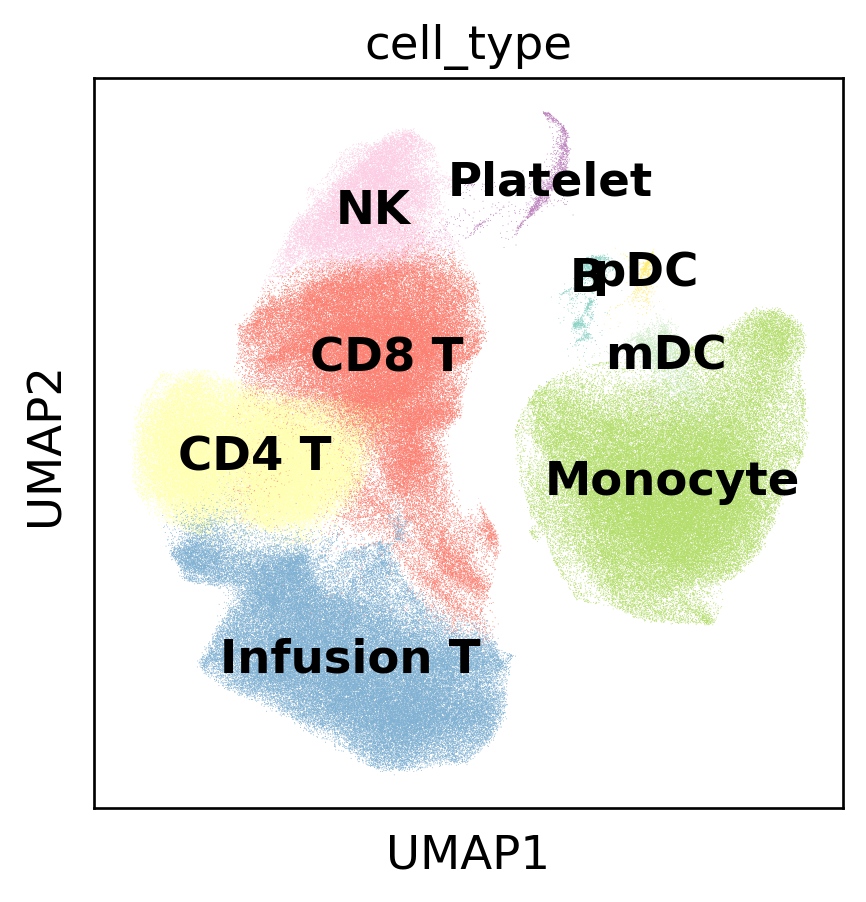

In [4]:
sc.pl.umap(adata,color='cell_type',legend_loc = 'on data',show=False,palette="Set3")

/home/njharlen/anaconda3/envs/scanpy1_8/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


<AxesSubplot:title={'center':'timepoint'}, xlabel='UMAP1', ylabel='UMAP2'>

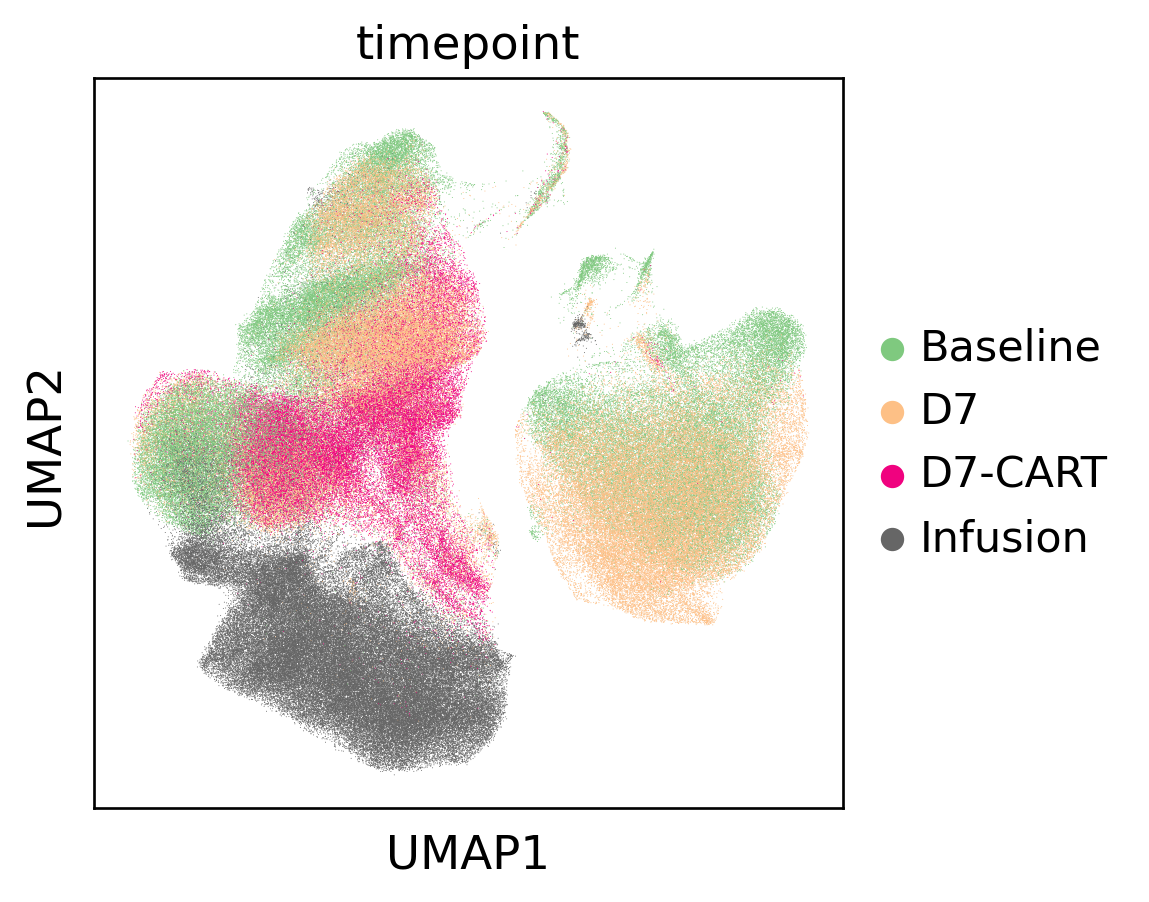

In [5]:
unsorted_idx = adata.obs['timepoint_fine']=='D7'
sc.pl.umap(adata[~unsorted_idx],color=['timepoint'],show=False,palette='Accent')

<AxesSubplot:title={'center':'barcode'}, xlabel='UMAP1', ylabel='UMAP2'>

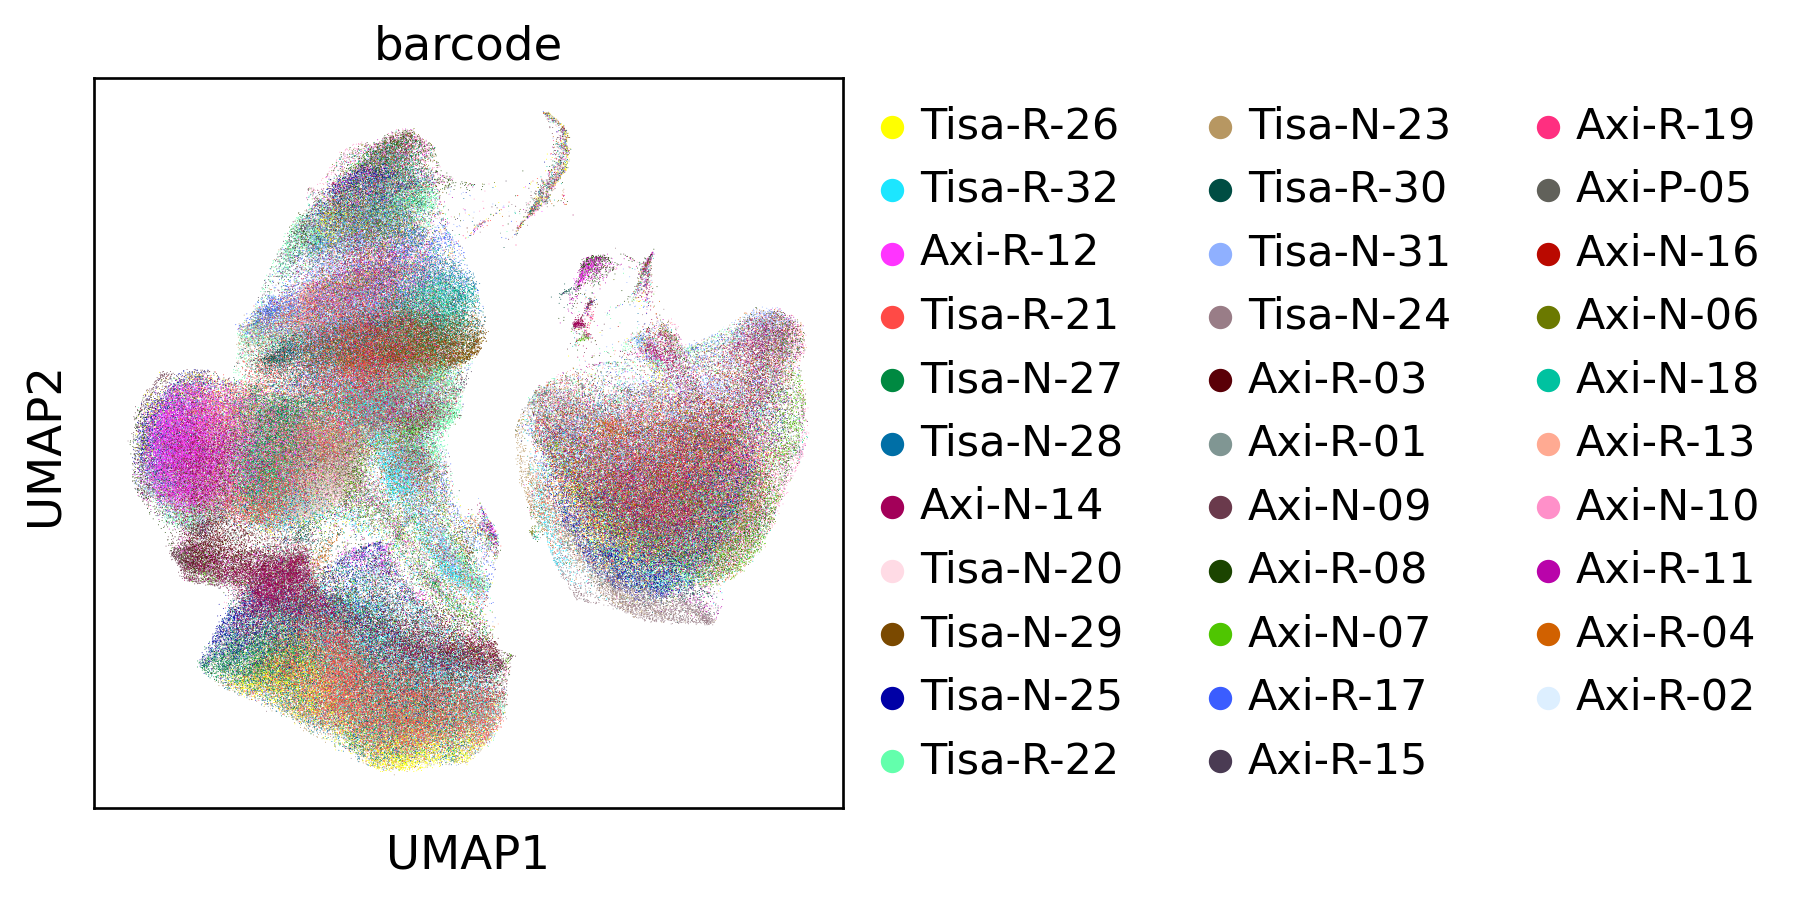

In [6]:
sc.pl.umap(adata,color=['barcode'],show=False)

# Figure 1f,g: 

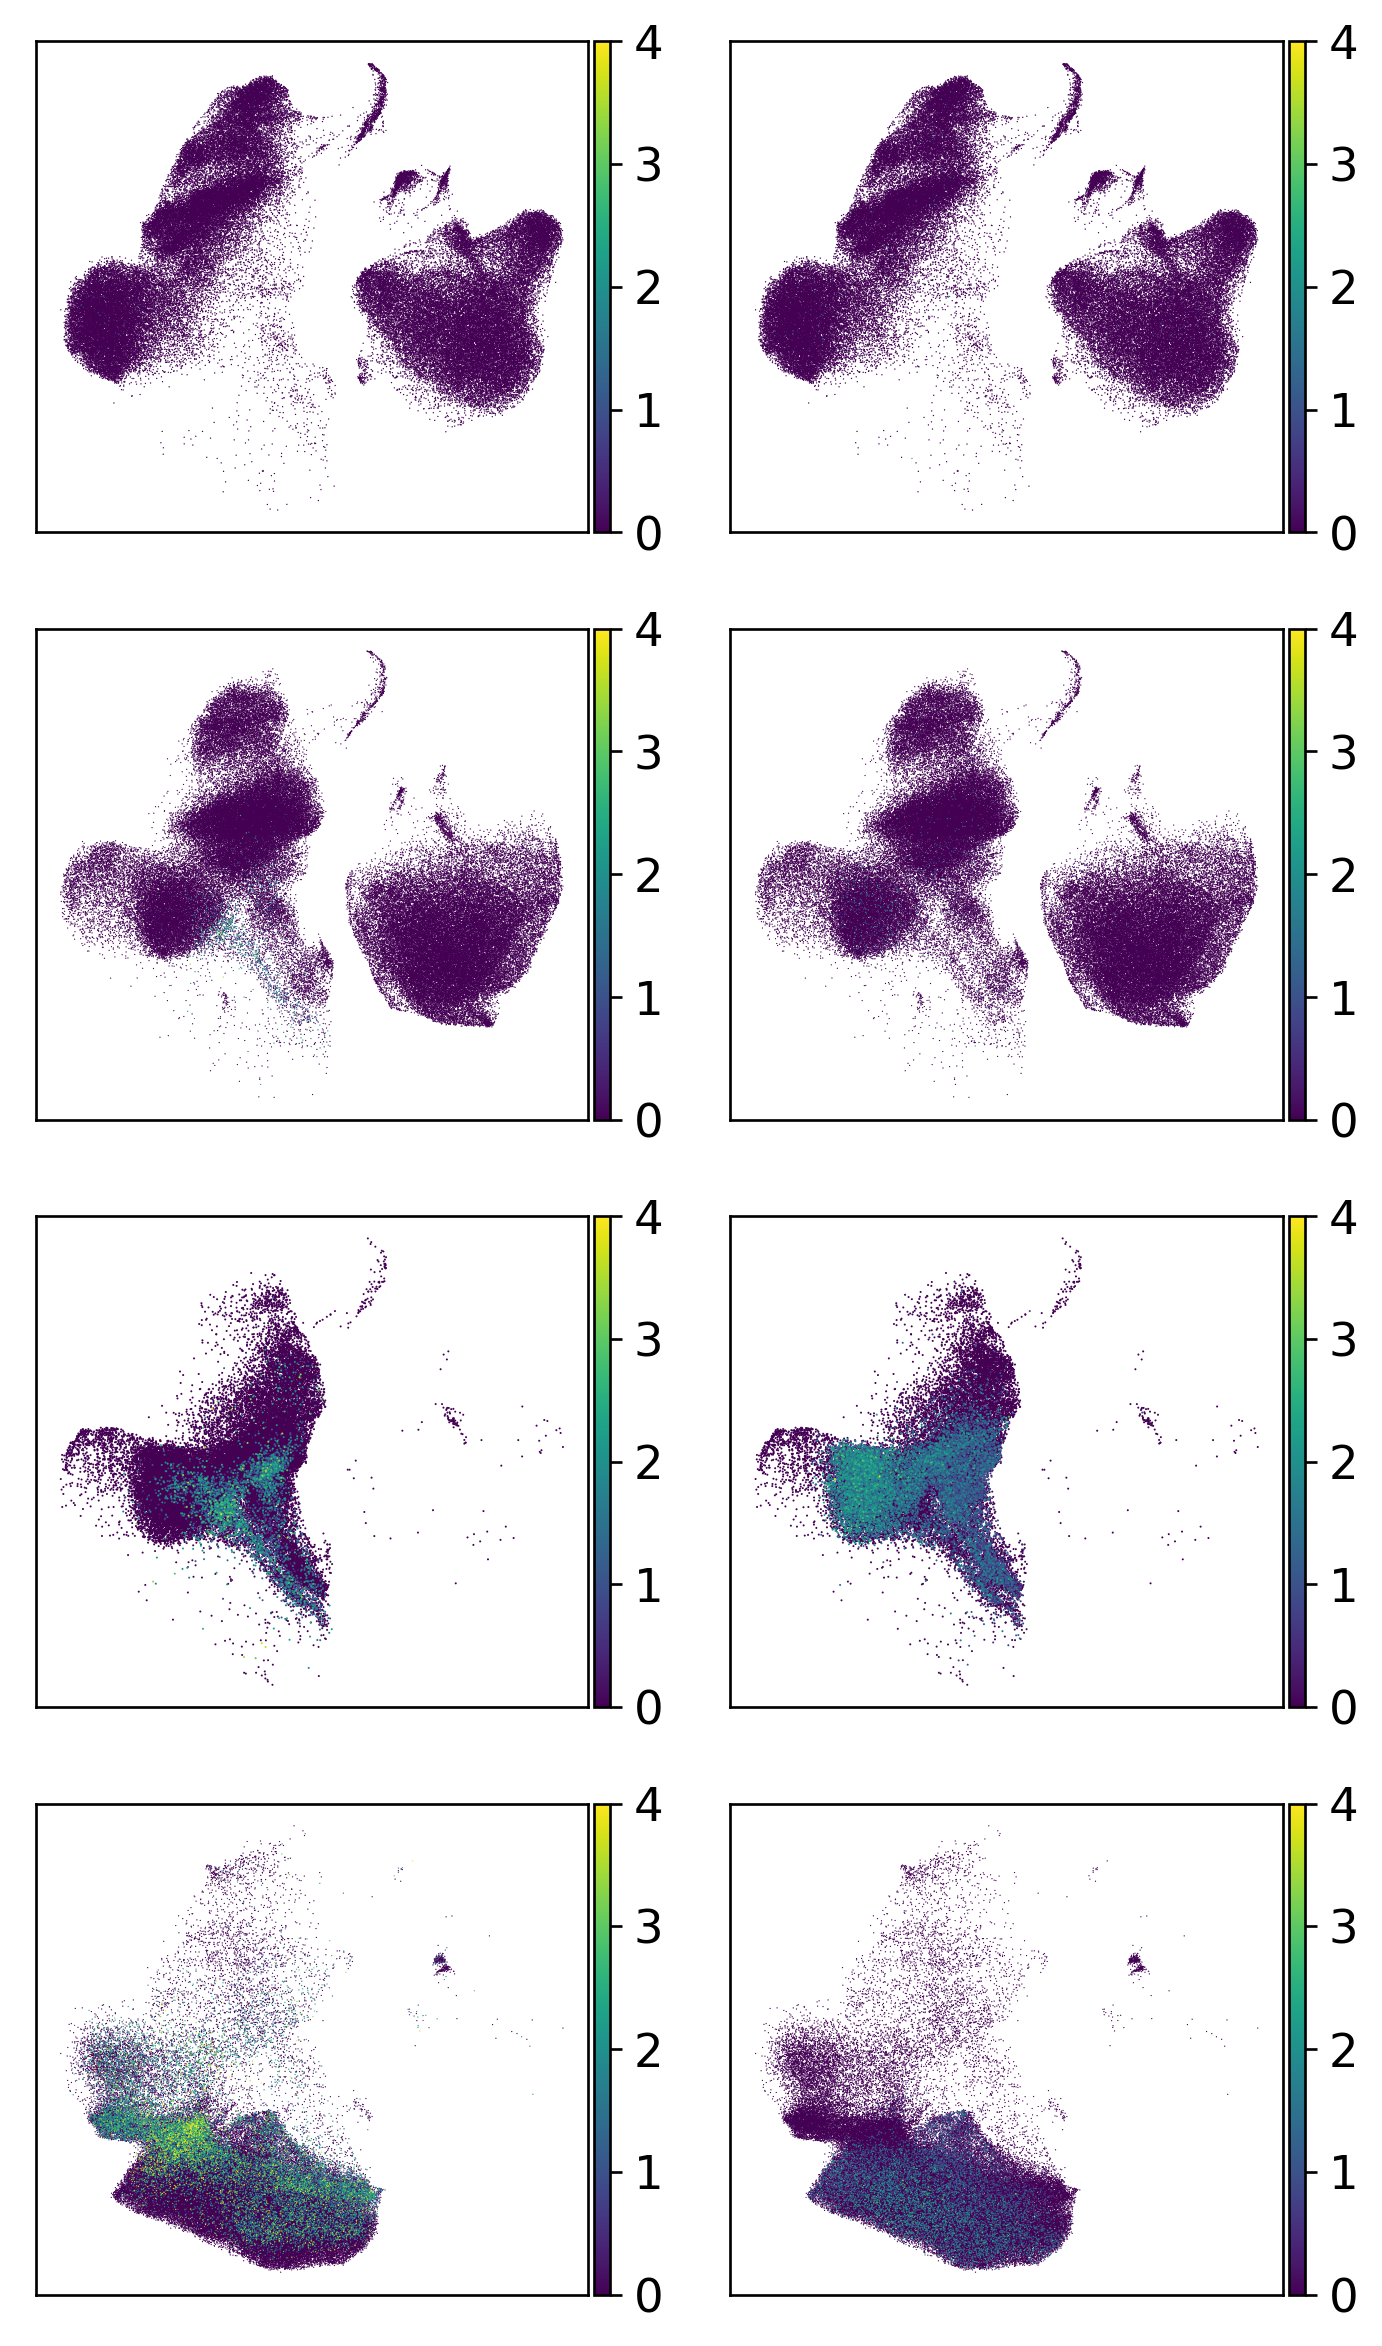

In [7]:


f,ax = plt.subplots(4,2,figsize=(6,10))

i=0
for tp,g in adata[~unsorted_idx].obs.groupby('timepoint'):
    factor = .5
    n_cells = g.shape[0]
    sc.pl.umap(adata[g.index,:],color='Yescarta',ax=ax[i,0],show=False,size=120000 / n_cells*factor,vmax=4)
    sc.pl.umap(adata[g.index,:],color='Kymriah',ax=ax[i,1],show=False,size=120000 / n_cells*factor,vmax=4)
    for j in range(0,2):
        ax[i,j].set_title('')
        ax[i,j].set_ylabel('')
        ax[i,j].set_xlabel('')
    

    i+=1
plt.tight_layout()


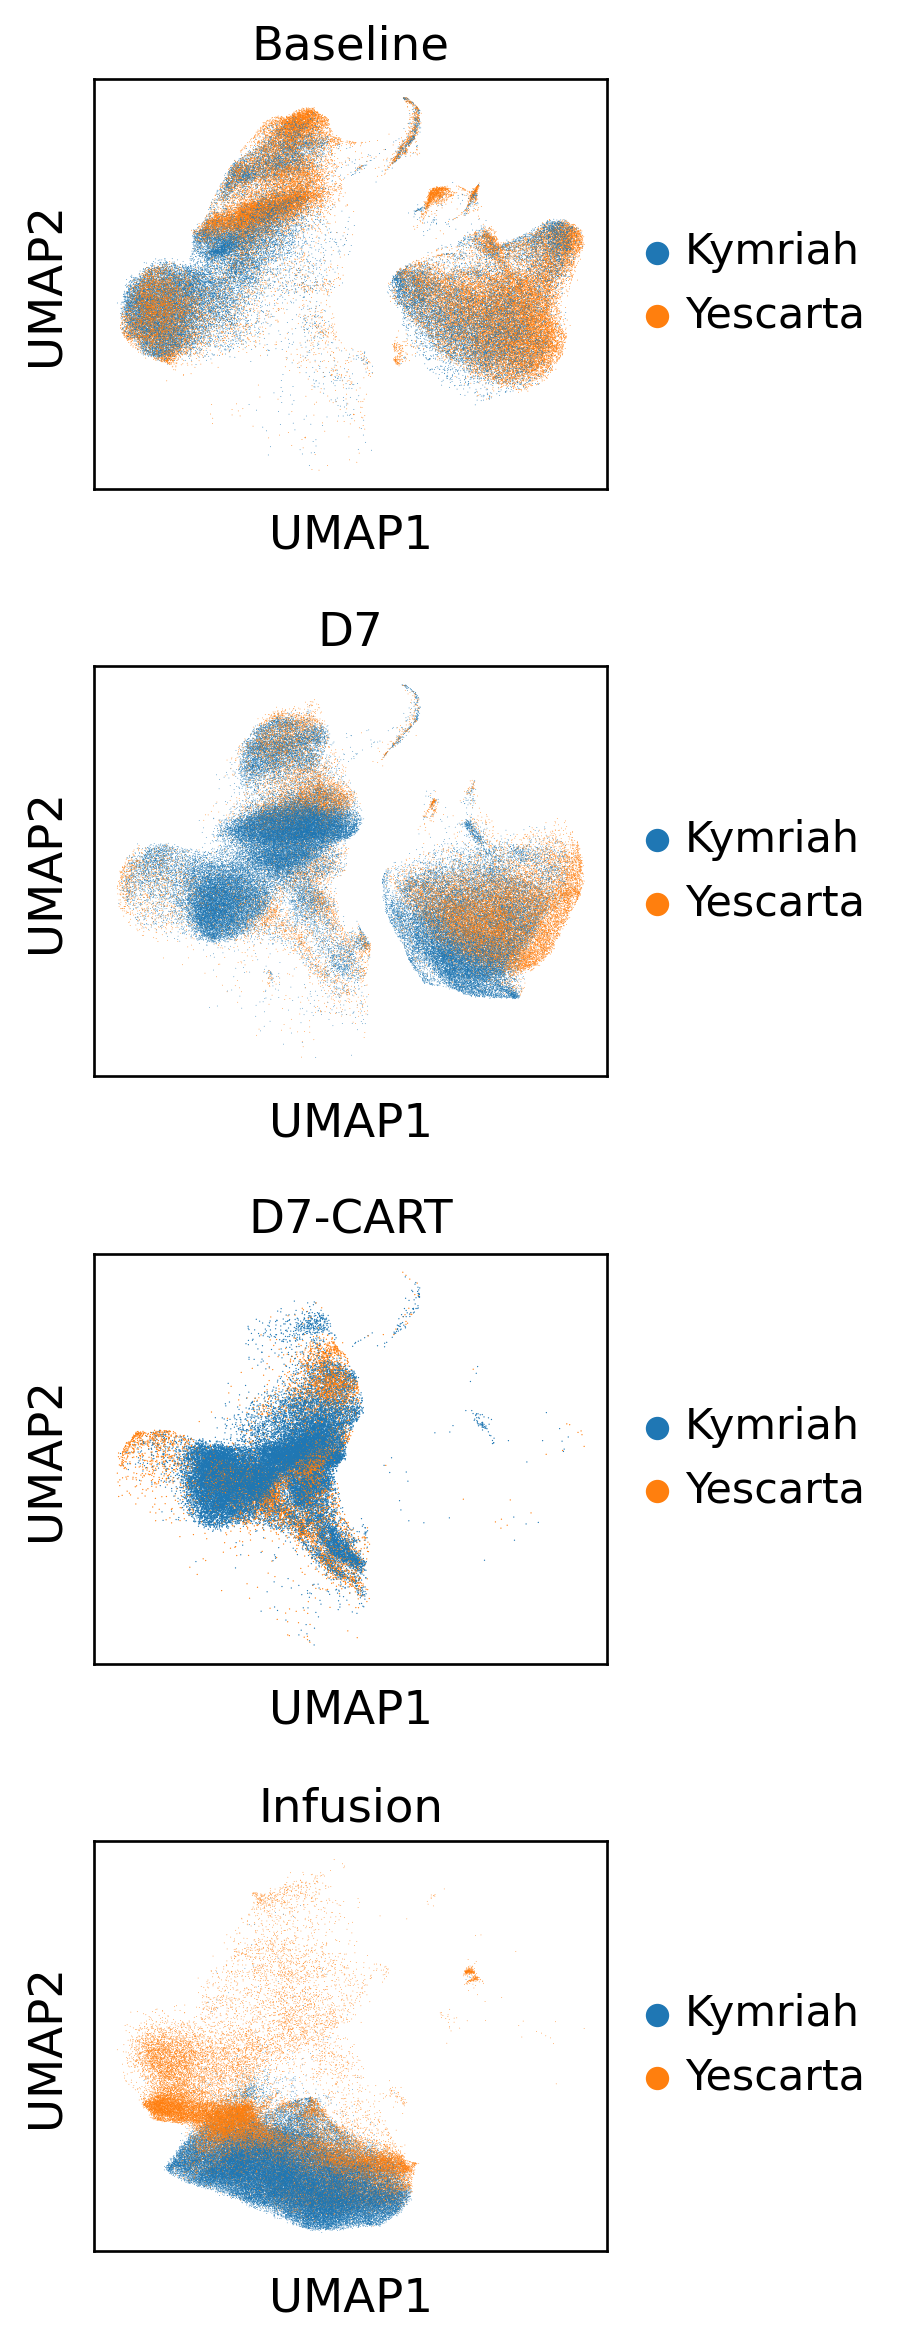

In [8]:
f,ax = plt.subplots(4,1,figsize=(4,10))

i=0
for tp,g in adata[~unsorted_idx].obs.groupby('timepoint'):
    factor = .2
    n_cells = g.shape[0]
    sc.pl.umap(adata[g.index,:],color='product',ax=ax[i],show=False,size=120000 / n_cells*factor)
    ax[i].set_title(tp)
    i+=1
plt.tight_layout()